# Bayesian Statistics

##### Keywords: bayesian,  binomial, beta-binomial, normal-normal model, MAP

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")

$\newcommand{\Lik}{p(D \vert \theta)}$

## Contents
{:.no_toc}
* 
{: toc}

## Frequentist Statistics
Frequentists believe the truth is out there. There is some model, with some parameter setting, that generated the data. That model may be more complex than the one we're thinking about, but we'd like to belive that we have the correct model or a close one and we just need to figure out what Nature had set the dials to when it generated the data.

In frequentist statistics, therefore, the true parameter value $\theta^*$ is fixed and unknown. Given the dataset (sample) we have, we can estimate the parameter as $\hat{\theta}$, and the particular value of $\hat{\theta}$ we get depends on the dataset. But, on a differnt day with different luck in our collection process we'd have different data and different values of $\hat{\theta}$. The distribution of $\hat{\theta}$ over possible datasets is its sampling distribution (which does depend on the particular value of $\theta^*$ used to generate the data).

In summary, in frequentist approaches $\theta^*$ is fixed, but the guess we make about it, $\hat{\theta}$, contains some randomness, and we ought to worry about what other values of $\hat{\theta}$ we might have seen if we re-ran the whole process.

## The Bayesian Approach
Bayesians agree that the true parameters $\theta^*$ used by nature are probably fixed. But our limited knowledge of them means that $\theta^*$ can be modeled as a random variable, $\theta$. This requires us to specify a distribution for the just-invented varaible $\theta$, and this extra labor yeilds stronger results than frequentist analyses.

At its core, the Bayesian approach has two parts.

1. Instead of considering $\theta^*$ as a fixed-but-unknown value, actually treat it as a random variable. Decide what values it is likely to have before any data get involved. Is the average height in the US population likely to be 500 feet? Well then $\mu$ should have a low initial probabilty of being 500.  
2. Forget about alternate datasets. We got a particular dataset and should do the best we can with it.

The distirbution in 1) is called a prior distribution, and is a distillation of all information to date about the quantity of interest. Maybe you're able to say a lot becuase there's been good research already, (or you have a really strong hunch). Maybe you aren't able to say much at all. But either way, the prior encompasses everything you can say so far.

The goal of bayesian analyses is to update the starting distributions in light of your model/likelihood and the the new data in your dataset. The resulting [posterior] distributions will be everything there is to say about the parameters and much richer than the Frequentist results. But the price is specifying the prior distribution.

## Bayesian Components
There are a several distributions to keep track of in Bayesian statistics. This section details each one.

1. Prior - This is what we know or believe about $\theta$ before we start the collection/analysis
2. Posterior - This is what we know or believe about $\theta$ AFTER the collection analysis. For any given prior, the matchin posterior is _everything_ there is to say about $\theta$; any relevant property of $\theta$ can be derived.
3. Posterior _Predictive_ - This is the distribution we expect new _observations_ to obey after the analysis. The prior and posterior give the possible spread of _parameter values_ before and after analysis, the prior predictive and posterior predictive give the possible spread of _observations_ before and after analysis.

### Prior Distribution
The prior distribution $p(\theta)$ encompasses all knowledge of the parameters to date.  We have a separate notebook on setting the prior distribution. Suffice it to say that choosing priors is an art, but any two people with reasonable priors will quickly converge to the same posterior as the dataset grows.

In another perspective, priors are engineering assumptions we put in to regularize our models.

### Posterior Distribution
The posterior tells us everything we need to know about $\theta$, post-dataset. That is: $p(\theta \vert D)$ or $p(\theta \vert y)$.

It can be found directly from Bayes' theorem.

$$ p(\theta \vert y) = \frac{p(y \vert \theta)\,p(\theta)}{p(y)} $$
$$ posterior = \frac{likelihood \times prior}{evidence} $$

The denominator $p(D)$ or $p(y)$ is the overall probability of the dataset (across all settings of $\theta$ allowed by the prior) $p(y) = \int p(y \vert \theta) p(\theta)\ d\theta$. This can also be written $E_{p(\theta)}[p(y \vert \theta)]$, the avarage value of the likelihood according over $\theta$ drawn from the prior.

For all of that, the evidence is just the normalization constant. As we have seen we don't usually worry about the normalization constant when we're sampling. (Which is a good thing, becuase the evidence is typically very hard to calculate or approximate).

This diagram from McElreath's book gives you an idea of how the prior and likelihood interract to form the posterior.

![](images/priorxlike.png)

#### Multple parameters
What if $\theta$ is multidimensional, as it usually is? Then one can calculate the **marginal posterior** of one a particular parameter by integrating out the parameters we don't care about:

$$p(\theta_i \vert D) = \int p(\theta \vert D)\ d\theta^-_i.$$

### Posterior Predictive
Learning about the parameters of the model is nice for inference, but in most human endeavors the real goal is to predict the future. What _observations_ are likely to come up? For example, the posterior has told us the likely distributions of each of the slopes applied to weight and age in a regression. We want to know the risk of cancer a 200lb 50-year-old faces.

If the slopes were fixed values this would be simple enough: plug in to get the average cancer risk for someone with those features, and draw from the noise term to make a final value. Across lots of noise draws (or just using the noise distribution) we'd see the range of possible cancer risks for this individual.

But now the slope parameters themselves are random and could take on lots of values. In sampling terms, we'd first draw a set of slopes, plug in, then draw a random error term and produce our final cancer risk. Repeating the whole process, the distribution range of possible cancer risks would emerge.

The entire process is illustrated in this diagram for a beta-binomila model we'll do in just a bit. 

![](images/postpred.png)

At each value of the paramter p (playing the role of the slopes in the regression), there is a different set of likely outcomes. However, each outcome set is weighted by the prior probability of the parameter that generated it [hence the thickness of each line]. The weighted sum of the outcome graphs produces the final outcome graph, the posterior predictive, which folds in uncetainty about the true parameter values to our prediction. [See how the posterior predictive is wider than the prediction at any fixed value?]

#### Poserior Predictive Math
Analytically, we'd integrate out the slope paramteters:

$$p(y_{new} \vert D=\{y\}) = \int p(y_{new} \vert \theta)p(\theta \vert D=\{y\}) d\theta $$

If you like, this probability is the average of the likelihood with respect to the posterior $E_{\theta \sim posterior}[p(y_{new} \vert \theta)]$.

## Biased Coin tosses: Binomial-Beta
Code from the course textbook https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb

We'll be modelling the bias on a coin after we've collected a dataset of n tosses, h of which came up heads.

#### Conjugate Priors
Conjugate priors make life easy. A **conjugate prior** is one which, when multiplied with an appropriate likelihood, gives a posterior with the same functional form as the prior. In short, given a model, the conjugate prior is one that will give very simple mathematics and interpretation.

Likelihoods in the exponential family have conjugate priors in the same family, which makes them very useful. One of the big advantages of this setup is analytical tractability; another is increased interpretability.

Examples include Poisson-Gamma, Binomial-Beta, and Normal-Normal.

#### Coin [or globe] toss modelling
Coin tosses are modelled using the Binomial Distribution, which is the distribution of the sum of Bernoulli random variables. Equivalently, Binomial(n,b,h) gives the probability of seeing h heads after n tosses of a coin with bias b.

The likelihood is:  
    $$P(Heads=h) = Binom(n,b,h)$$
    $$h \sim Binom(n,b,h)$$

Our prior is:  
    $$p(Bias=b) = Beta(\alpha,\beta)$$ 
    $$b \sim Beta(\alpha,\beta)$$

We write our prior beliefs as a beta because the beta distribution is the conjugate prior to a binomial likelihood. We're free to choose any other distribution, but we'd need to do much harder integrals.

So, if we observed h heads in n trials our posterior is:

$$ p(Bias=b \vert Heads=h) \propto p(Heads=h \vert Bias=b) P(Bias=b) = Binom(n,b,h) \times Beta(\alpha, \beta)$$

Because of the conjugacy, this turns out to be:

$$Beta(h + \alpha, n - h + \beta)$$

This makes updating our prior VERY easy. We start with $Beta(a,b)$ (which is effectively "we've observed a heads and b tails so far), and after observing y more heads and n-y more tails we update to $Beta(a+y,b+y-n)$.

Here we use a $Beta(1,1)$ prior since it is equivalent to a uniform distribution. This is an **uninformative prior**. Here the prior adds one heads and one tails to the actual data, providing some "towards-center" regularization to the model.

In [2]:
import scipy.stats as stats
beta = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]

In [3]:
def make_data(p, trial_array):
    data = stats.bernoulli.rvs(p, size=trial_array[-1])
    return data

### The globe-tossing seal
Let's revisit the globe tossing model we talked about at the beginning of class. Briefly, the model was that a seal tosses a globe in the air. When it comes back to her nose, she notes down whether the globe came up land (tails) or water (heads). We'll assume $p=0.7$ to generate the data. Once again remember to forget that.

Of course, the seal is just tossing a coin with the bias towards water set to 0.7, so the beta/binomial structure remains.

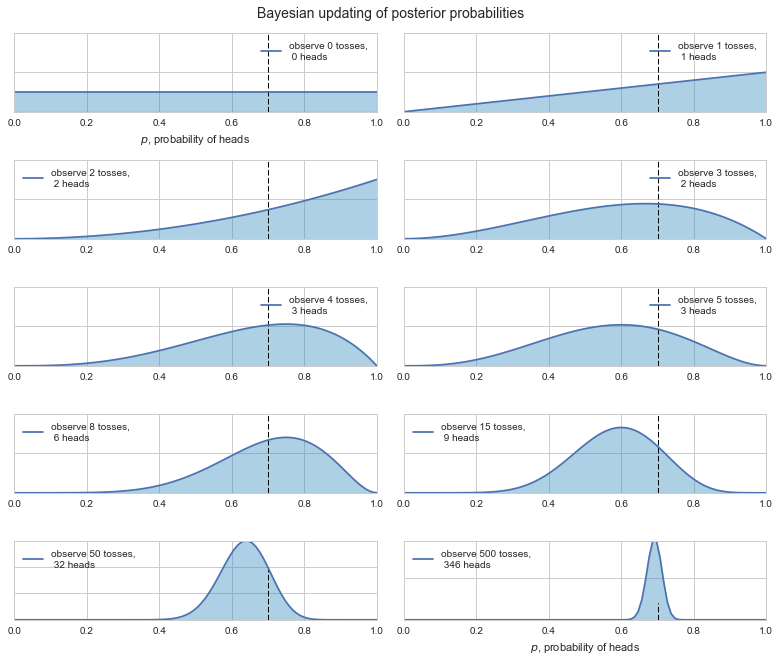

In [19]:
plt.figure(figsize=(11, 9))

p2=0.7
data = make_data(p2, n_trials)
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    #posterior distribution.
    y = beta.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(p2, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

### Globe Tossing With a Different Prior

What if we used a more informative prior, e.g. that the earth has more water in a  2 to 1 ratio. This is where the Beta comes in useful, as it has an iterpretation in terms of "prior" heads and "prior" tails (here 2 and 1 respectively). This allows us to nudge our machine in low data situations.

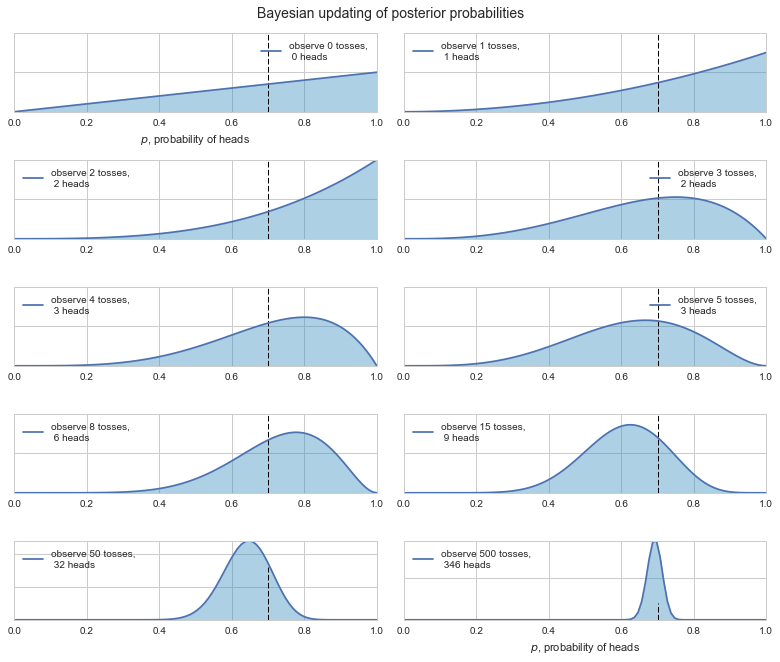

In [20]:
plt.figure(figsize=(11, 9))

x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    #posterior distribution. note changed prior
    y = beta.pdf(x, 2 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(p2, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

Notice that for low data the posteriors are somewhat shifted. You can also see that for large amounts of data the prior gets washed out and the posteriors are nearly identical.